## 목차
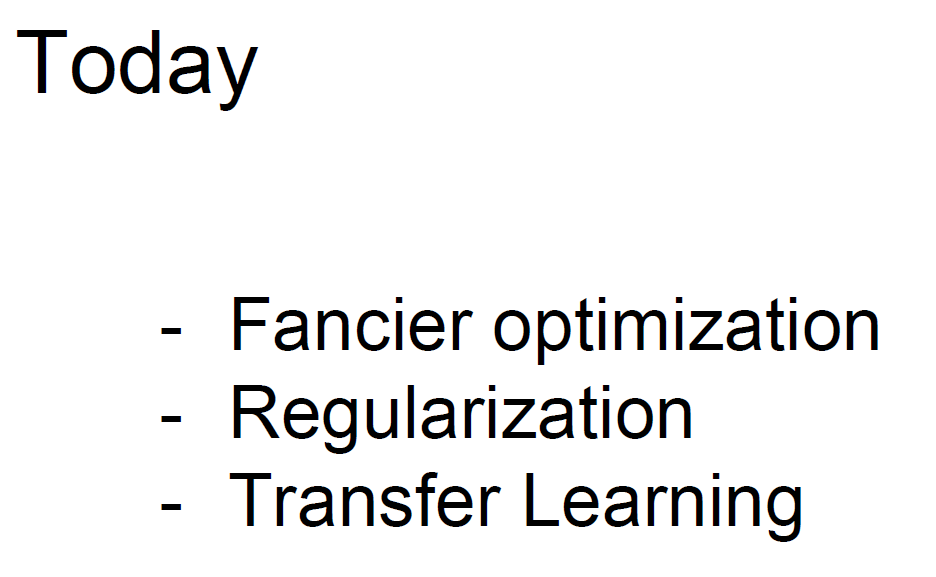

##### 이번 강에서는 NN에서 쓰이는 더욱 실용적인 optimization 알고리즘들과 regularization 을 소개한다. 그리고 Transfer Learning에 대해서 배울 것이다.

## Optimization(SGD)
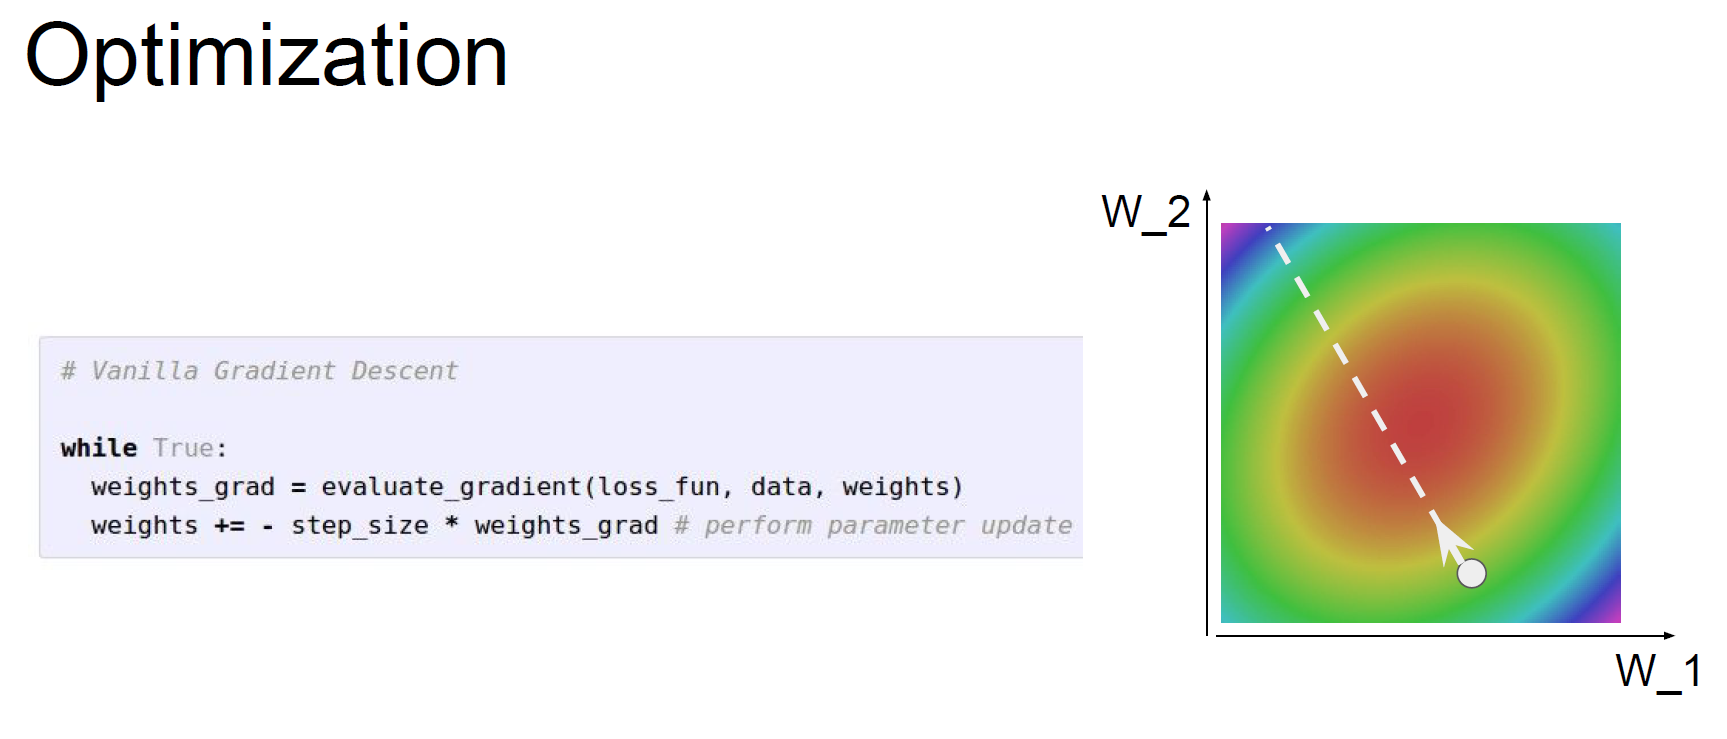


##### 궁극적인 목표는 최소의 loss 값을 갖는 w를 찾아서 빨간 지점에 도달하는 것이다.
##### 이전에 SGD 방식을 배웠는데, 그저 기울기가 음수이면 step, 이를 계속 반복해서 optimization을 해가는 방식이다.
##### 하지만 이 방식은 간단한 만큼 문제를 가지고 있다.

## SGD의 문제점
##### 1. taco shell problem : loss가 수직 방향으로만 sensitive해서 동일하게 이동하지 못하고, 지그재그로 이동하게 되는 문제. 고차원일수록 문제가 심각해짐.
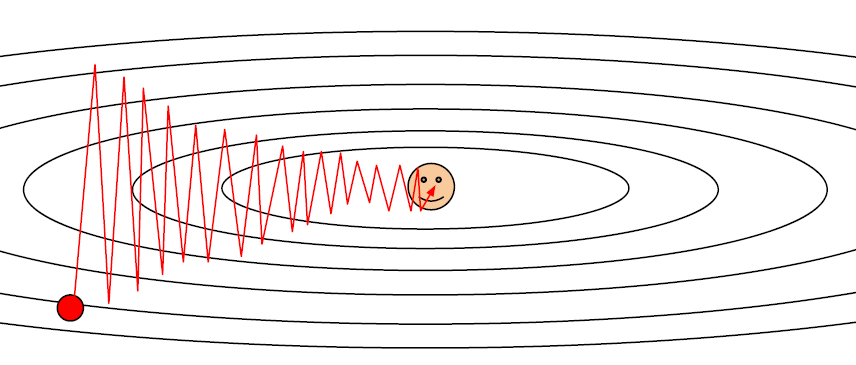

##### 2. local minima : 극대값들 사이에 극소값에 안착하게 되는 경우이다. SGD의 경우 기울기가 0인 지점을 loss의 최소값으로 찾아 최적점으로 인식하는 원리라 local minima에서는 더 이상 update가 이뤄지지 않는다.
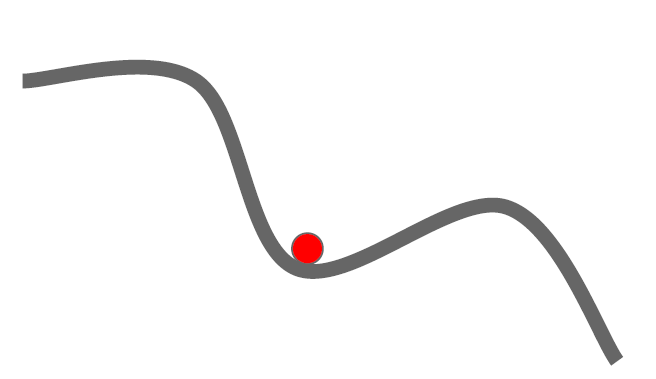

##### 3. saddle point : 아래 그림처럼 해당 위치에 안착하는 경우이다. 데이터가 고차원일수록 잘 일어나고, 기울기 0인 주변 지점의 기울기가 매우 작아져서 update도 굉장히 느려지는 문제가 발생한다.
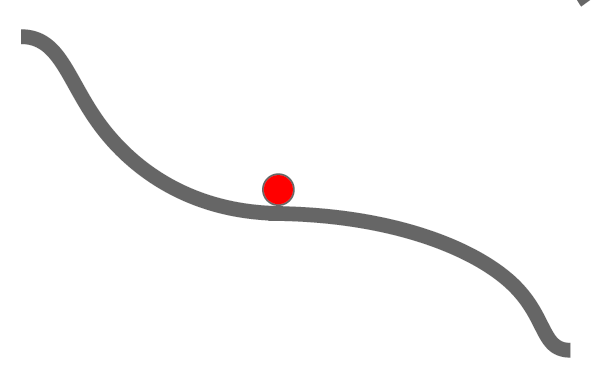

##### 4. 'S'tochastic의 문제 발생 : 미니배치마다 loss를 계산하여 전진해나가는데, 매우 비효율적이다. 또, 미니배치마다 update를 위해 추정값을 이용하는데 이것이 엄청난 noise를 일으킨다.
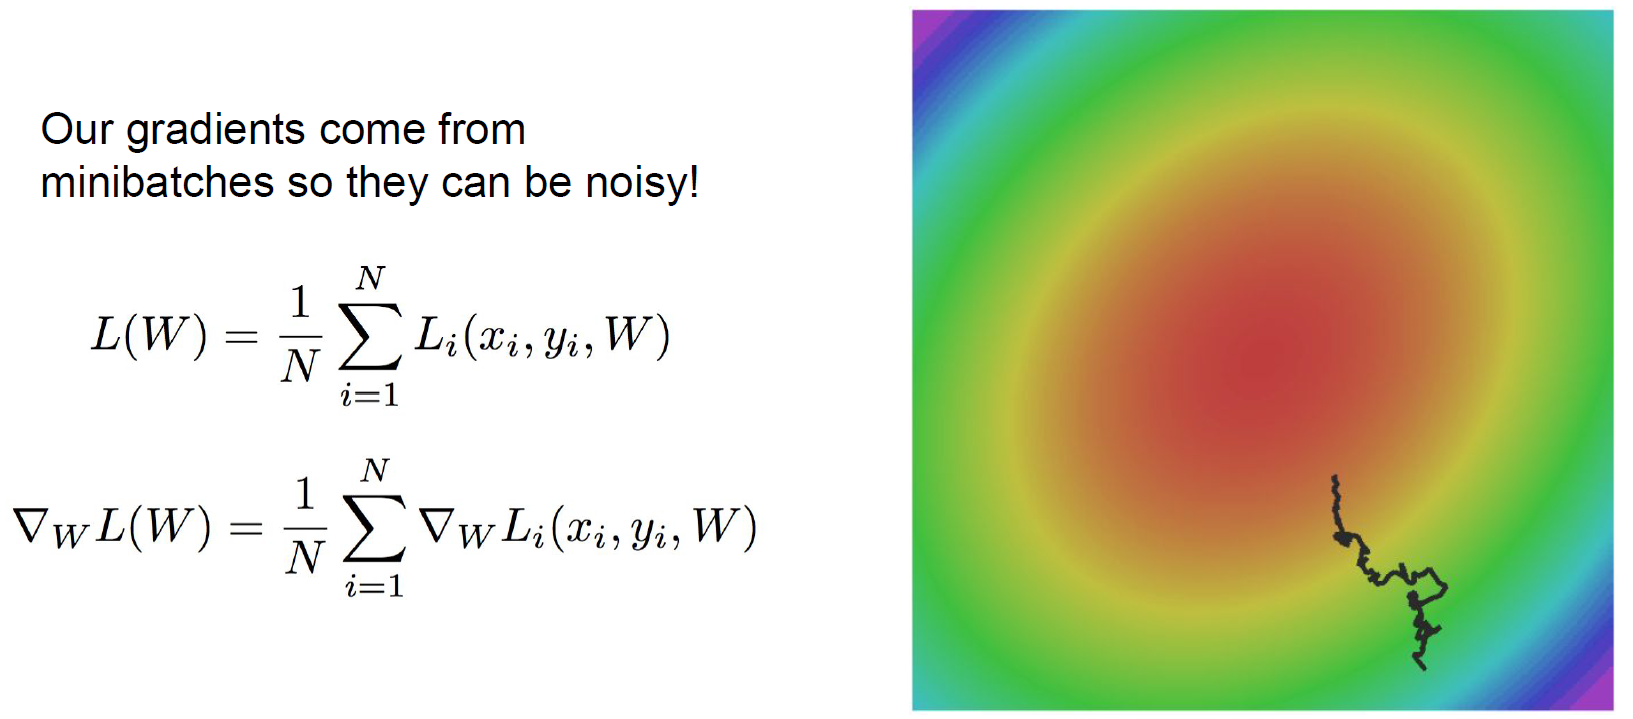

##### Q : full batch를 이용한 gradient descent를 이용하면, 해결할 수 있는가?
##### A : taco shell, saddle point 문제는 full batch에서도 여전히 존재하는 문제이므로 좀 더 공상적이고, 수학적인 접근이 필요하다.

## SGD + Momentum
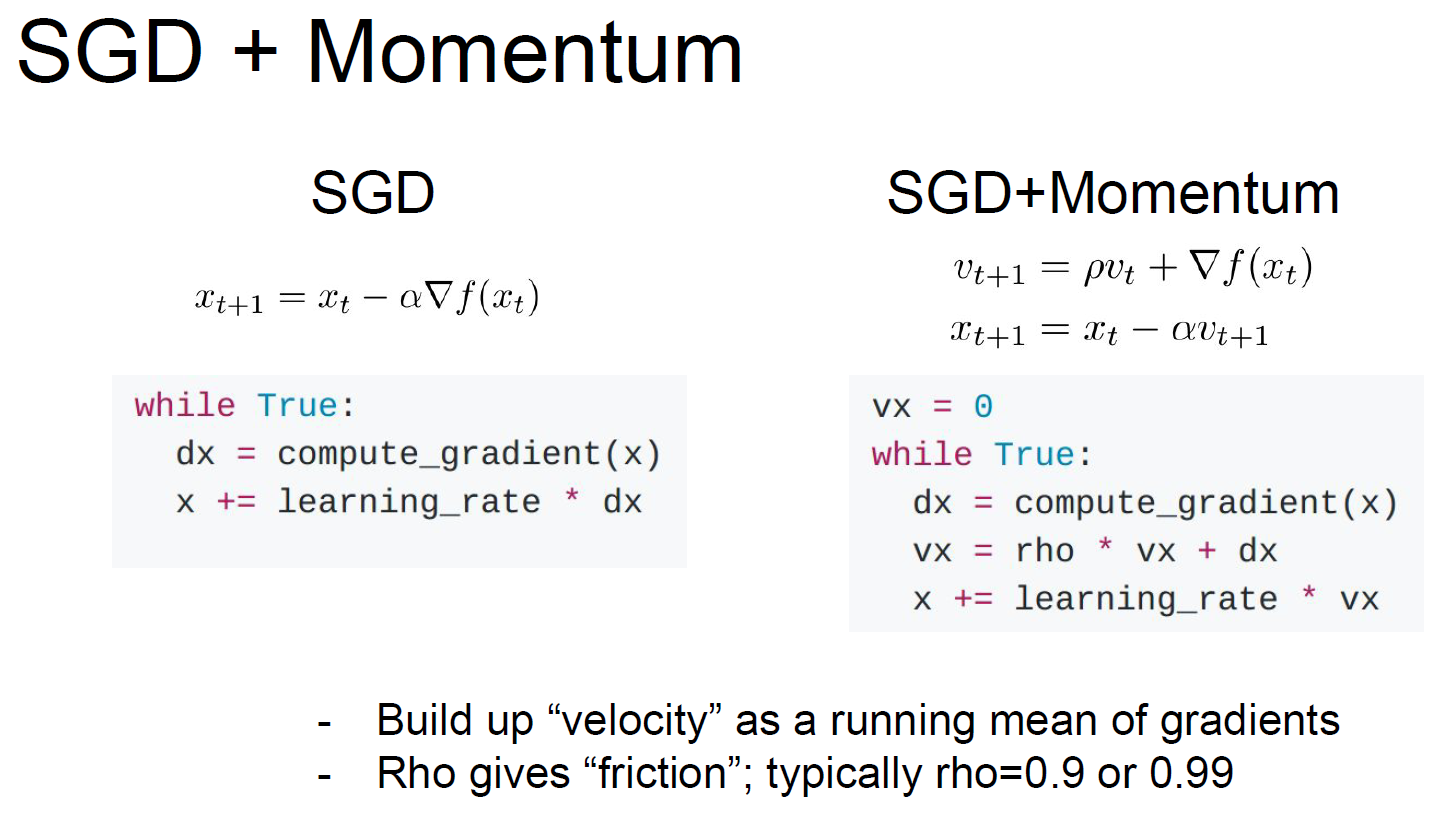

##### 기본 SGD에 약간의 모멘텀(운동량 = 마찰값)을 넣어서 기울기가 0인 지점에서도 update가 되는 알고리즘이다.
##### 그리고 taco shell 문제를 어느정도 해결해준다.
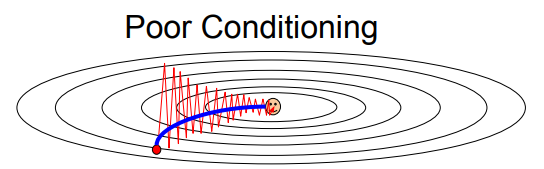

## Nesterov Momentum
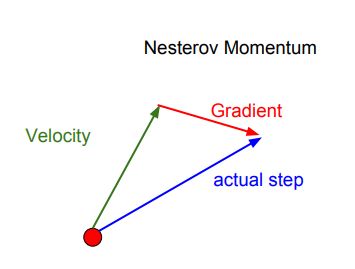

##### 빨간 스타트 점에서 velocity 방향으로 출발한 뒤, 거기서 gradient를 계산한다. 그리고 다시 원점으로 돌아가 actual step으로 최적화를 진행한다. -> nn와 같은 non-convex 문제에서는 보장된 방식 아님
* velocity의 initialization은 항상 0

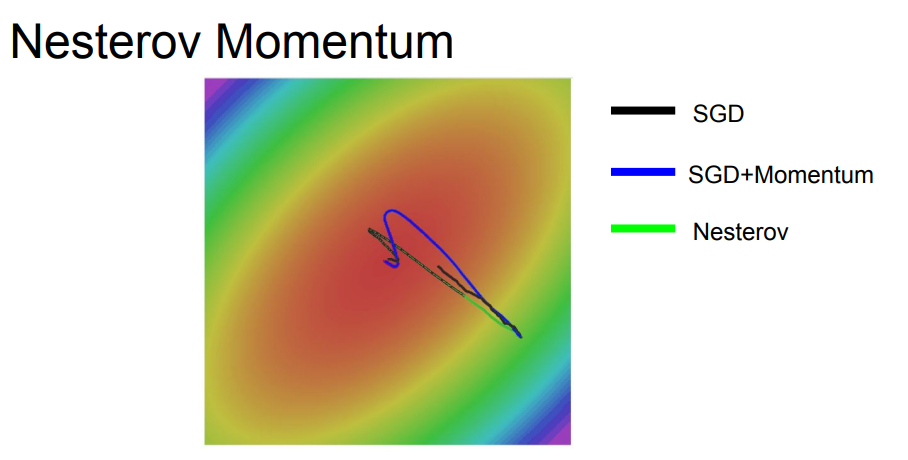

##### SGD는 느리고, 모멘텀과 Nesterov는 약간 오버슈팅한다.

## AdaGrad
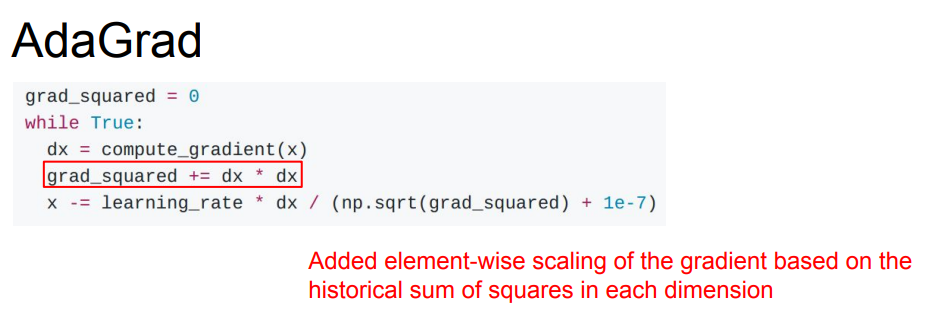

##### 가속도가 아닌 기울기의 제곱값을 이용한다. 학습중에 기울기의 제곱값을 grad_squred에 계속 더해나가서 update step에서 나눠준다.
##### samll gradient인 경우 grad_squared가 작은 값으로 나눠주니 속도가 더 잘 붙고, large gradient인 경우에는 큰 수로 나누어서 wiggling dimension은 slowdown해서 천천히 내려온다.
##### 하지만, 문제점은 stepsize가 오랜시간 지속되는 상황에서는 grad가 매우 작아지니깐 굉장히 느려진다. 일반적으로 convex 상황에서 효과가 좋다.

## RMSProp
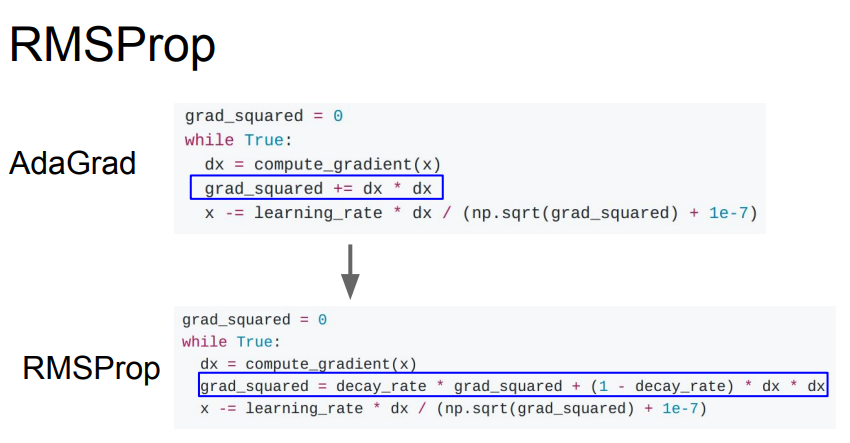

##### AdaGrad와 매우 유사하지만, 여기서는 train 동안에 값을 계속해서 축적시킨다. 그래서 decay 값을 삽입한다.
##### 매우 비슷한 step이지만 RMSProp의 추정값들이 더욱 leaky하다.

## Adam (almost)
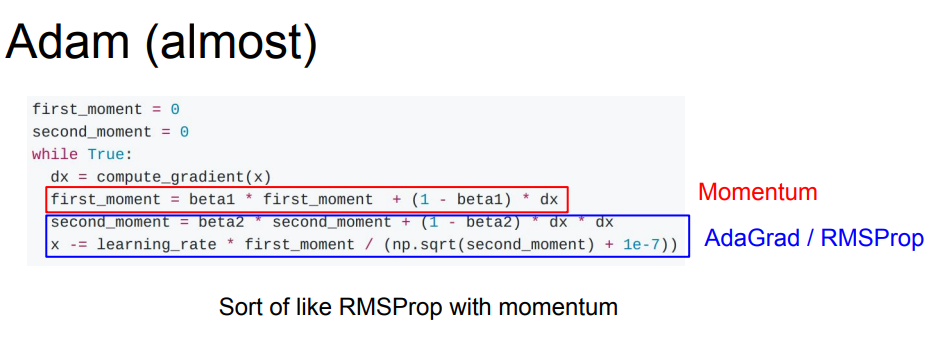

##### AdaGrad와 모멘텀 둘 다 사용한 방식
##### 아주 작은 수로 나눠주게 되니깐 초반에는 large step이 가능해서 효율성이 뛰어나다.

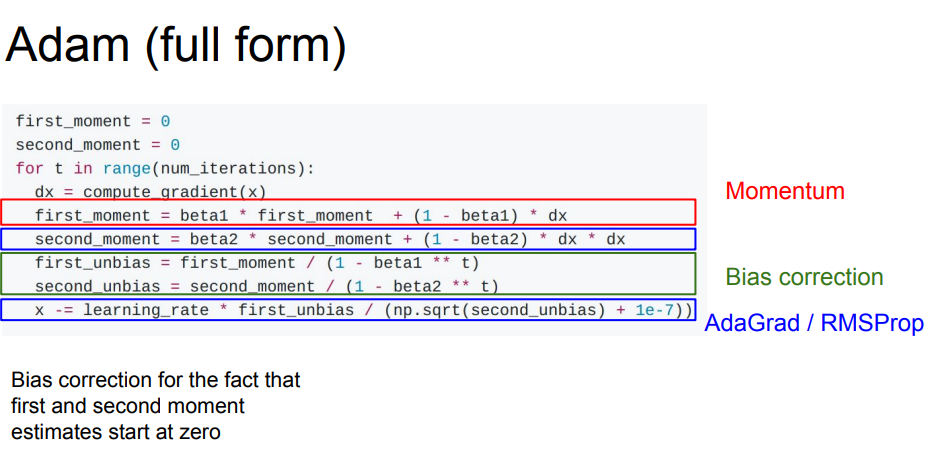

##### 초기 large step 문제 때문에 Bias correction 코드를 추가한다.
##### 만약 first step이 너무 커지면, landscape의 bad part로 빠져, 이 후 step들을 망치게 된다. (주로 자연상수 e는 -7, -8이 잘 동작한다.
##### 아담이 현재 최고 성능을 내고 가장 많이 사용하는 알고리즘이다.

* 참고 : 지금까진 우리는 도함수를 이용해 기울기 값을 통한 최적화를 수행했는데, 2차 함수를 이용해서 jump하는 Second order 방식도 있다. (nn는 너무나도 고차원이라 연산량이 벅참)

## Model Ensembles
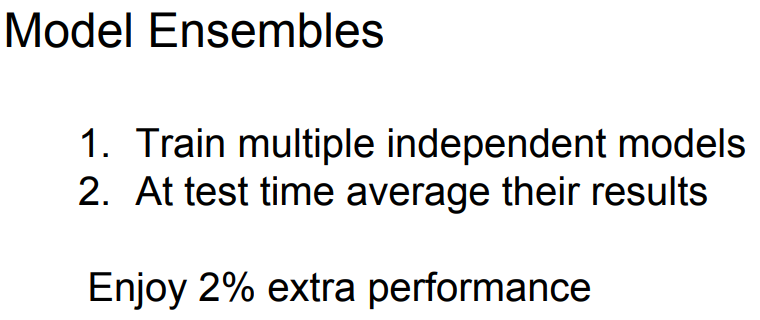

##### 모델을 여러 개 만드는 것이 비용, 시간적으로 부담이 될 수 있다. 그래서 학습 도중에 모델들을 저장해서 이를 평균내는 방식이 있다.

## Regularization
##### 과적합을 줄이는 방식 중 하나는 규제항을 추가하는 것이다. 하지만, 우리가 알고 있는 L1, L2는 잘 사용하지 않고 Drop out을 많이 사용한다.
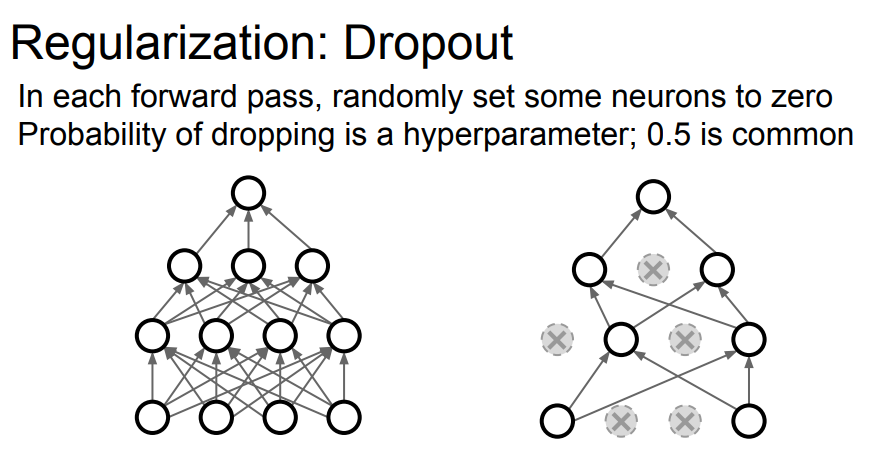

##### 임의로 layer에 1번씩 Dropout을 넣어주는데, 몇몇 노드들을 랜덤하게 off해버리는 것이다.
##### foward pass 과정에서 일부 뉴런의 activation 값을 0으로 만들어 버린다.
##### Dropout이 전문가의 일정 능력을 저하시키는 것이 아니라 전문가의 수를 줄여 과적합을 막는 것이라고 이해하자. (co-adaptation of feature) 예방
##### 그리고 과접합을 막는 방법 중 하나가 Data Augmentation이다
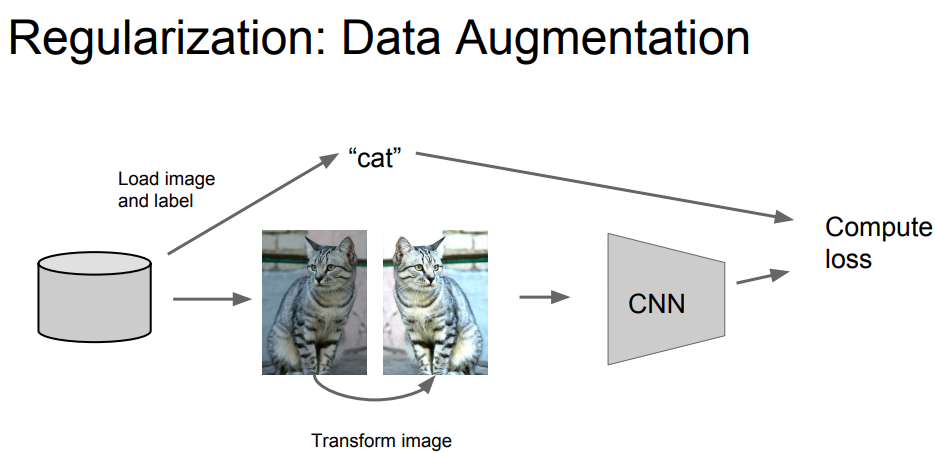

##### 학습중에 label은 보존한 채로 이미지를 변형시켜서 학습시키는 것이다.

## Transfer Learning
##### CNN을 많은 데이터로 학습해야한다는 편견을 깨주었다.
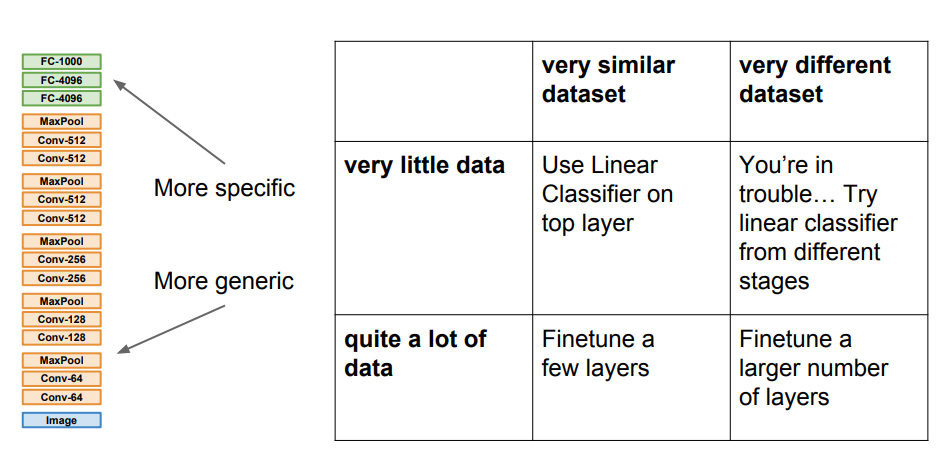

## 요약
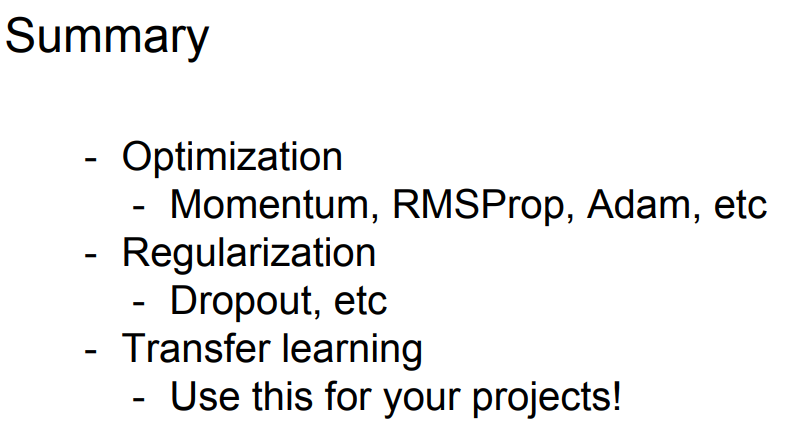